TensorFlow es una plataforma de código abierto de extremo a extremo para el aprendizaje automático

In [1]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

Se cargan los datos de digitos desde el dataset de ejemplo de sklearn

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [2]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images
cl =  digits.target


Histograma por clases (número de ejemplos por clase)

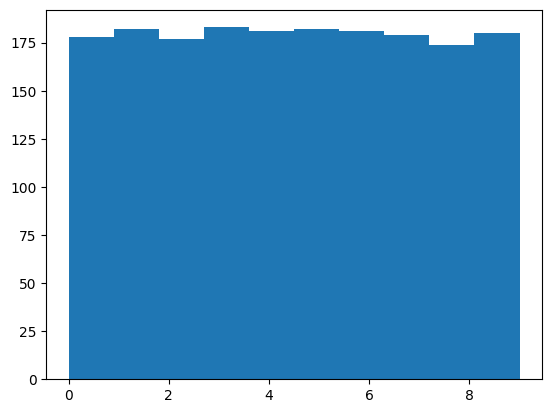

In [3]:
plt.hist(cl, bins=10)
plt.show()

In [4]:
onehot_encoder=OneHotEncoder(sparse=False)
reshaped=cl.reshape(len(cl), 1)
cl=onehot_encoder.fit_transform(reshaped)
print(len(cl))
print(cl[:5])

1797
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data,cl, test_size=0.3, shuffle=True)

Mostrar la primera imagen utilizando Matplotlib

(1257, 8, 8)


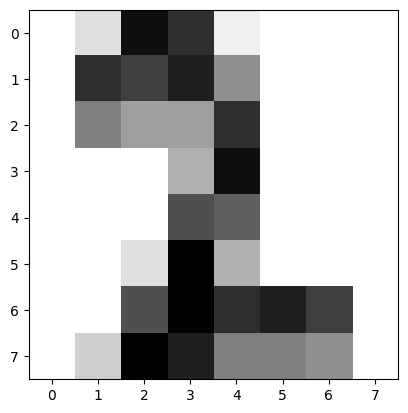

In [6]:
print(X_train.shape)
plt.imshow(X_train[20], cmap=plt.cm.binary)
plt.show()

Imprimir la lista de salidas deseadas

In [7]:
print(y_train)
print(y_train[20])

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Histograma que muestra la distribucion de las salidas deseadas

Preprocesamiento, normalización de las imagenes

In [8]:
print(X_train.shape)
X_train=X_train.reshape(len(X_train),64)
print(X_train.shape)

print(X_test.shape)
X_test=X_test.reshape(len(X_test),64)
print(X_test.shape)

(1257, 8, 8)
(1257, 64)
(540, 8, 8)
(540, 64)


Construción del modelo de RNA

In [9]:
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-12,tol=1e-3,
                    hidden_layer_sizes=(64,32,16,10),learning_rate='constant',
                    learning_rate_init=0.01, max_iter=500, momentum=0.9, verbose=True)



Entrenamiento del modelo

In [10]:
classifier.fit(X_train,y_train)

Iteration 1, loss = 7.44756463
Iteration 2, loss = 4.34704744
Iteration 3, loss = 3.57515236
Iteration 4, loss = 3.05179616
Iteration 5, loss = 2.74019433
Iteration 6, loss = 2.46142771
Iteration 7, loss = 2.21142884
Iteration 8, loss = 1.94662998
Iteration 9, loss = 1.74180781
Iteration 10, loss = 1.56016300
Iteration 11, loss = 1.34855018
Iteration 12, loss = 1.19876306
Iteration 13, loss = 1.08053650
Iteration 14, loss = 0.99603176
Iteration 15, loss = 0.98476449
Iteration 16, loss = 0.84717342
Iteration 17, loss = 0.76238546
Iteration 18, loss = 0.73512551
Iteration 19, loss = 0.65605734
Iteration 20, loss = 0.59279369
Iteration 21, loss = 0.51623540
Iteration 22, loss = 0.45186475
Iteration 23, loss = 0.41347957
Iteration 24, loss = 0.37653706
Iteration 25, loss = 0.34373495
Iteration 26, loss = 0.29745941
Iteration 27, loss = 0.29009283
Iteration 28, loss = 0.24445271
Iteration 29, loss = 0.20663807
Iteration 30, loss = 0.21793571
Iteration 31, loss = 0.18620692
Iteration 32, los

MLPClassifier(alpha=1e-12, hidden_layer_sizes=(64, 32, 16, 10),
              learning_rate_init=0.01, max_iter=500, tol=0.001, verbose=True)

Grafica del Error en entrenamiento y validación

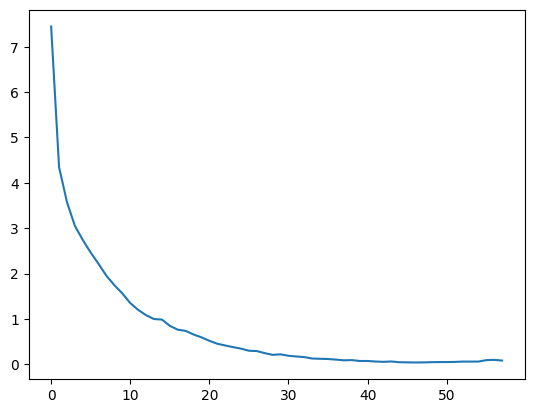

In [11]:
plt.plot(classifier.loss_curve_)

prueba del modelo

In [12]:
test_pred=classifier.predict(X_test)
cm=multilabel_confusion_matrix(y_test, test_pred)
print(cm)

[[[481   1]
  [  0  58]]

 [[472   4]
  [  1  63]]

 [[482   0]
  [  3  55]]

 [[484   3]
  [  2  51]]

 [[486   0]
  [  8  46]]

 [[491   1]
  [  2  46]]

 [[475   0]
  [  7  58]]

 [[479   6]
  [  0  55]]

 [[490   6]
  [  3  41]]

 [[498   1]
  [  3  38]]]


Métrias desempeño

In [13]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       0.94      0.98      0.96        64
           2       1.00      0.95      0.97        58
           3       0.94      0.96      0.95        53
           4       1.00      0.85      0.92        54
           5       0.98      0.96      0.97        48
           6       1.00      0.89      0.94        65
           7       0.90      1.00      0.95        55
           8       0.87      0.93      0.90        44
           9       0.97      0.93      0.95        41

   micro avg       0.96      0.95      0.95       540
   macro avg       0.96      0.95      0.95       540
weighted avg       0.96      0.95      0.95       540
 samples avg       0.94      0.95      0.94       540



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ejemplo produción

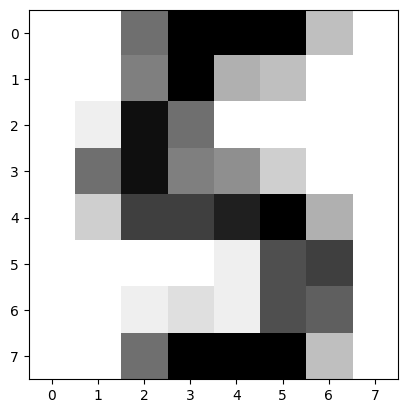

[[0 0 0 0 0 1 0 0 0 0]]


In [14]:
img=X_test[25]
npimg=np.array(img)
npimg=npimg.reshape(8,8)
plt.imshow(npimg, cmap=plt.cm.binary)
plt.show()

result=classifier.predict([img])
print(result)